## Advance Regression

In [1]:
import sys
import os
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')
data.shape

(1460, 81)

In [3]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
data.duplicated().sum()

0

In [7]:
import seaborn as sns

AttributeError: 'AxesSubplot' object has no attribute 'unique'

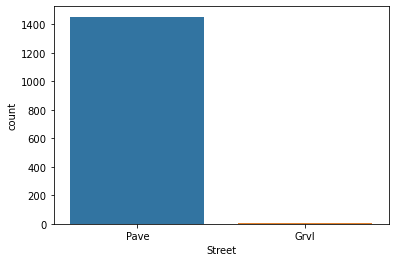

In [8]:
#Checking how the houses are located as per streets.

sns.countplot(data['Street']).unique()

In [ ]:
data[data['Street']== 'Grvl'].describe()

In [ ]:
data[data['Street']== 'Pave'].describe()

In [9]:
data.head

<bound method NDFrame.head of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Util

<AxesSubplot:>

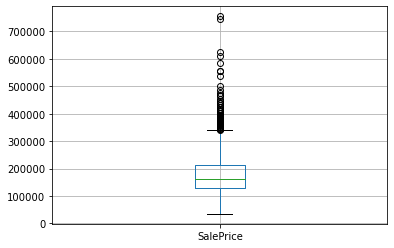

In [10]:
data[['SalePrice']].boxplot()

In [11]:
(data.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
print(data["FireplaceQu"].unique())

[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


In [13]:
nan_cols = [i for i in data.columns if data[i].isnull().any()]
print(nan_cols)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [16]:
nan_cols45 = [i for i in data.columns if data[i].isnull().sum() > 0.45*len(data)]
print(nan_cols45)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [17]:
# we should remove columns which has higher percentages of null values, because such columns 
# wont add value in prediction and analysis as well
# columns which has more than 80% null values : ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
# column which has 45% null values 'FireplaceQu'
# we can remove these columns stright away
# id also not a useful column for our purpose so we can drop it as well
cleanerData =   data.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id'],axis='columns')

In [18]:
cleanerData.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  
2        0       0       9    2008        WD         Normal    223500  
3        0       0       2    2006        WD        Abnorml    140000  
4        0       0      12    2008        WD         Normal    250000  

[5 rows x 75 columns]

In [19]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [20]:
# we must change the year features to duration as below so that we get better correlation details
cleanerData['YearBuilt_Old'] = cleanerData.YearBuilt.max()-cleanerData.YearBuilt
cleanerData['YearRemodAdd_Old'] = cleanerData.YearRemodAdd.max()-cleanerData.YearRemodAdd
cleanerData['GarageYrBlt_Old'] = cleanerData.GarageYrBlt.max()-cleanerData.GarageYrBlt
cleanerData['YrSold_Old'] = cleanerData.YrSold.max()-cleanerData.YrSold
cleanerData[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold  YearBuilt_Old  \
853        1964          1964       1964.0    2009             46   
849        1976          1994       1976.0    2007             34   
1249       1950          1950       1950.0    2007             60   
1361       2005          2005       2005.0    2009              5   
1424       1958          1983       1970.0    2007             52   
1325       1922          1950          NaN    2008             88   
769        2003          2003       2003.0    2010              7   
332        2003          2004       2003.0    2009              7   
1092       1925          1950       1925.0    2008             85   
190        1932          1994       1932.0    2007             78   

      YearRemodAdd_Old  GarageYrBlt_Old  YrSold_Old  
853                 46             46.0           1  
849                 16             34.0           3  
1249                60             60.0           3  
1361                 5              5.0           1  
1424                27             40.0           3  
1325                60              NaN           2  
769                  7              7.0           0  
332                  6              7.0           1  
1092                60             85.0           2  
190                 16             78.0           3

In [21]:
#now we can drop the original year columns
cleanerData = cleanerData.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')
cleanerData.shape

(1460, 75)

In [22]:
cleanerData[list(cleanerData.dtypes[cleanerData.dtypes!='object'].index)].describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452  ...   
std     181.066207   456.098091   161.319273   441.866955   438.705324  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000   223.000000   795.750000  ...   
50%       0.000000   383.500000     0.000000   477.500000   991.500000  ...   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000  ...   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000  ...   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean      3.409589    15.060959     2.758904     43.489041     6.321918   
std      29.317331    55.757415    40.177307    496.123024     2.703626   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
25%       0.000000     0.000000     0.000000      0.000000     5.000000   
50%       0.000000     0.000000     0.000000      0.000000     6.000000   
75%       0.000000     0.000000     0.000000      0.000000     8.000000   
max     508.000000   480.000000   738.000000  15500.000000    12.000000   

           SalePrice  YearBuilt_Old  YearRemodAdd_Old  GarageYrBlt_Old  \
count    1460.000000    1460.000000       1460.000000      1379.000000   
mean   180921.195890      38.732192         25.134247        31.493836   
std     79442.502883      30.202904         20.645407        24.689725   
min     34900.000000       0.000000          0.000000         0.000000   
25%    129975.000000      10.000000          6.000000         8.000000   
50%    163000.000000      37.000000         16.000000        30.000000   
75%    214000.000000      56.000000         43.000000        49.000000   
max    755000.000000     138.000000         60.000000       110.000000   

        YrSold_Old  
count  1460.000000  
mean      2.184247  
std       1.328095  
min       0.000000  
25%       1.000000  
50%       2.000000  
75%       3.000000  
max       4.000000  

[8 rows x 37 columns]

In [23]:
#lets correct categorical columns by replacing category values to numbers
cleanerData[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()


LandSlope ExterQual BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0       Gtl        Gd       Gd       TA           No          GLQ   
1       Gtl        TA       Gd       TA           Gd          ALQ   
2       Gtl        Gd       Gd       TA           Mn          GLQ   
3       Gtl        TA       TA       Gd           No          ALQ   
4       Gtl        Gd       Gd       TA           Av          GLQ   

  BsmtFinType2 HeatingQC CentralAir KitchenQual GarageFinish GarageQual  \
0          Unf        Ex          Y          Gd          RFn         TA   
1          Unf        Ex          Y          TA          RFn         TA   
2          Unf        Ex          Y          Gd          RFn         TA   
3          Unf        Gd          Y          Gd          Unf         TA   
4          Unf        Ex          Y          Gd          RFn         TA   

  GarageCond ExterCond LotShape  
0         TA        TA      Reg  
1         TA        TA      Reg  
2         TA        TA      IR1  
3         TA        TA      IR1  
4         TA        TA      IR1

In [24]:
cleanerData['LandSlope'] = cleanerData.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
cleanerData['ExterQual'] = cleanerData.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
cleanerData['BsmtQual'] = cleanerData.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
cleanerData['BsmtCond'] = cleanerData.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
cleanerData['BsmtExposure'] = cleanerData.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
cleanerData['BsmtFinType1'] = cleanerData.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
cleanerData['BsmtFinType2'] = cleanerData.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
cleanerData['HeatingQC'] = cleanerData.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
cleanerData['CentralAir'] = cleanerData.CentralAir.map({'N':0,'Y':1})
cleanerData['KitchenQual'] = cleanerData.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
cleanerData['GarageFinish'] = cleanerData.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
cleanerData['GarageQual'] = cleanerData.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
cleanerData['GarageCond'] = cleanerData.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
cleanerData['ExterCond'] = cleanerData.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
cleanerData['LotShape'] = cleanerData.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [25]:
cleanerData[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

LandSlope  ExterQual  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          0          3       4.0       3.0           1.0           6.0   
1          0          2       4.0       3.0           4.0           5.0   
2          0          3       4.0       3.0           2.0           6.0   
3          0          2       3.0       4.0           1.0           5.0   
4          0          3       4.0       3.0           3.0           6.0   

   BsmtFinType2  HeatingQC  CentralAir  KitchenQual  GarageFinish  GarageQual  \
0           1.0          4           1            3           2.0         3.0   
1           1.0          4           1            2           2.0         3.0   
2           1.0          4           1            3           2.0         3.0   
3           1.0          3           1            3           1.0         3.0   
4           1.0          4           1            3           2.0         3.0   

   GarageCond  ExterCond  LotShape  
0         3.0          2         3  
1         3.0          2         3  
2         3.0          2         0  
3         3.0          2         0  
4         3.0          2         0

In [30]:
!pip install plotly

In [31]:
import plotly.express as px
fig = px.scatter_matrix(cleanerData)
fig.show()

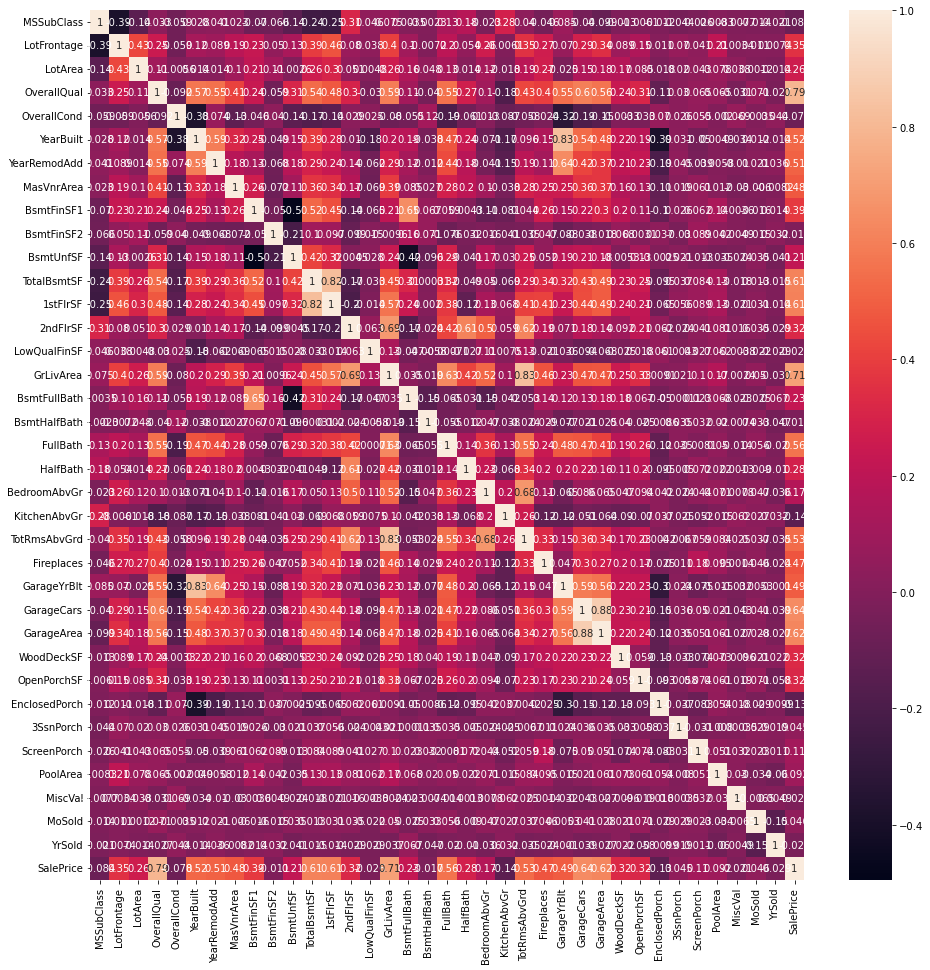

In [96]:
# lets check the correlation between all variables
plt.figure(figsize=(16,16))
sns.heatmap(cleanerData[list(cleanerData.dtypes[cleanerData.dtypes!='object'].index)].corr(),annot=True)
plt.show()

# it is hard to understand using heatmap lets do it with corr() function


In [97]:
cleanerData.corr()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

In [98]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [99]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [100]:
cleanerData.corr().unstack().sort_values().drop_duplicates()

BsmtFinSF1    BsmtUnfSF       -0.495251
BsmtFullBath  BsmtUnfSF       -0.422900
YearBuilt     EnclosedPorch   -0.387268
MSSubClass    LotFrontage     -0.386347
YearBuilt     OverallCond     -0.375983
                                 ...   
1stFlrSF      TotalBsmtSF      0.819530
GrLivArea     TotRmsAbvGrd     0.825489
GarageYrBlt   YearBuilt        0.825667
GarageArea    GarageCars       0.882475
MSSubClass    MSSubClass       1.000000
Length: 667, dtype: float64

In [101]:
dfCorr = cleanerData.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
print(filteredDf)

               MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
MSSubClass            NaN          NaN      NaN          NaN          NaN   
LotFrontage           NaN          NaN      NaN          NaN          NaN   
LotArea               NaN          NaN      NaN          NaN          NaN   
OverallQual           NaN          NaN      NaN          NaN          NaN   
OverallCond           NaN          NaN      NaN          NaN          NaN   
YearBuilt             NaN          NaN      NaN     0.572323          NaN   
YearRemodAdd          NaN          NaN      NaN     0.550684          NaN   
MasVnrArea            NaN          NaN      NaN          NaN          NaN   
BsmtFinSF1            NaN          NaN      NaN          NaN          NaN   
BsmtFinSF2            NaN          NaN      NaN          NaN          NaN   
BsmtUnfSF             NaN          NaN      NaN          NaN          NaN   
TotalBsmtSF           NaN          NaN      NaN     0.537808          NaN   

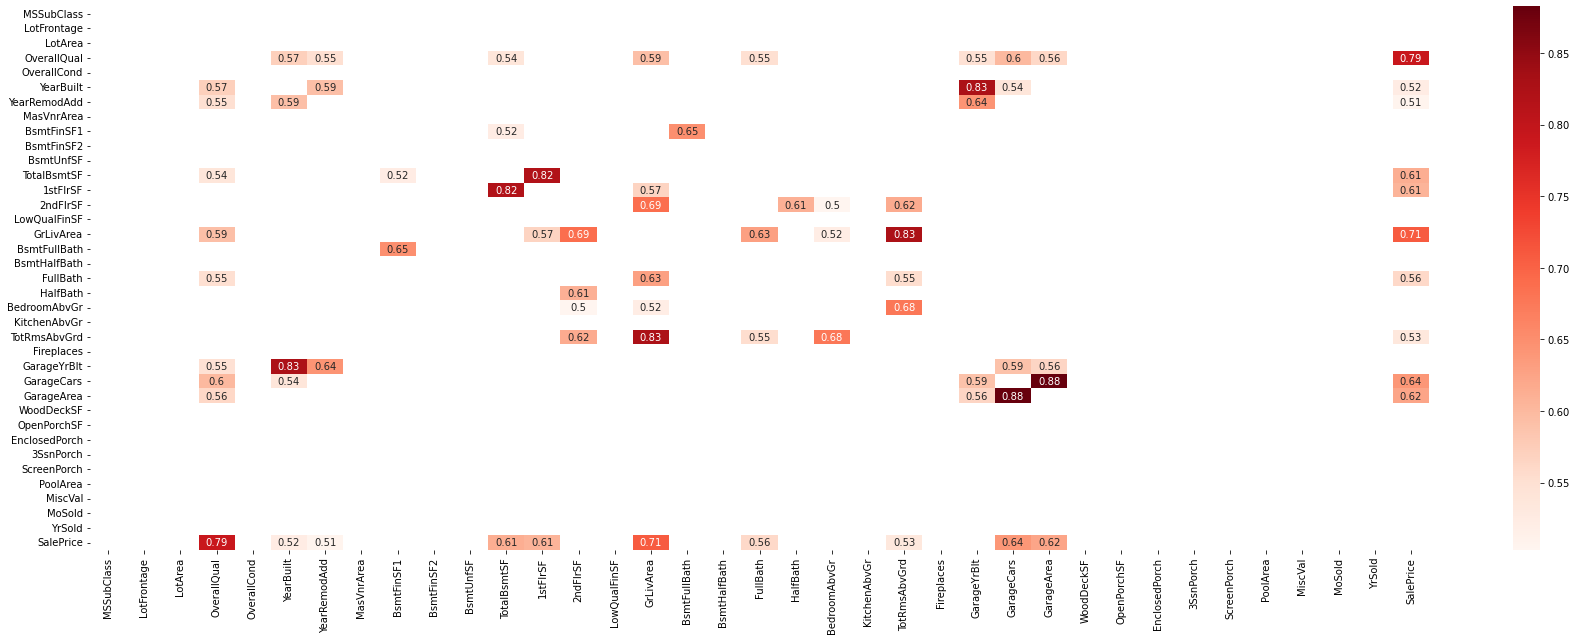

In [102]:
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

(1460, 75)

In [105]:
print(data["LotFrontage"].unique())

[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


In [15]:
rslt_df = data[data['LotFrontage'] = 'NA'] 
rslt_df

SyntaxError: invalid syntax (Temp/ipykernel_10416/2587544222.py, line 1)